In [ ]:
Experimenting with classification accuracy and the different proportions used in data spliting for the players.csv dataset. 

INTRODUCTION:
Video games have become a staple form of entertainment across many age groups, and understanding the behavior of players can offer insights into user engagement, marketing strategies, and game design. In particular, player activity metrics—such as play time and age—may be linked to whether individuals are interested in further gaming-related content, such as newsletters or community updates.

In this project, I will choose the first question of the three promopt questions to base my data analyses and question off of. I will explore how the classifer will use play time (in hours) and age to predict subscribing to a game-related newsletter. The data comes from a sample of individuals who play Minecraft, and includes details such as their age, play time, gender, and subscription status. This analysis will help assess whether these variables can meaningfully predict user subscription behavior.

My specific question:
Can Age and played_hours variables predict whether a individual subscribes to a game-related newsletter in the players.csv dataset and can a higher or lower proportion used to split the data for tuning increase or decrease the accuracy of the model singificantly (>5) via KNN classification?

DATA DESCRIPTION:
The dataset used in this project, players.csv, contains information on individuals who play Minecraft, including whether or not they subscribed to a gaming newsletter. It originally included multiple variables, but for this analysis, three key variables were selected:



Variable statistic table:

subscribe is currently a logical variable, it will be a potential issue for us as we will need it to be a factor for knn classification.

played_hours and Age are double precision (decimal or whole numbers)


subscribe (logical): Whether or not the individual subscribed to a gaming newsletter (TRUE or FALSE).

This is the response variable in the analysis.

played_hours (double): The total number of hours the player has spent playing Minecraft.

Age (double): The age of the player in years.

After cleaning and selecting relevant columns, the final dataset consists of:

196 observations

3 variables

The data was collected by running a Minecraft server and recording the players actions during the game. Probably used a survey to collect Age ranges. 

Summary statistics for the mean of both numerical variables are:
played_hours: 5.85
Age: 20.52 -> 21

Observations about the data:
- The played_hours variable contains a wide range, including players with 0 hours, indicating new or inactive users.

- The dataset includes players as young as 9 years old, data set has a diverse age range.

- The mean for played_hours is around 6 hours so these are pretty casual players.

- Average players are around 21 years old.

- Players with ages over 15 play two hours less on average on the server than those who are under 15 (5.89 v 7.87) 

This cleaned dataset will be used to build classification models to predict newsletter subscription status based on play time and age, and to explore the effect of data splitting proportions on model accuracy.



In [55]:
library(tidymodels)
library(tidyverse)
library(ggplot2)

In [85]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [96]:
players_clean <- players |>
                select(subscribe, played_hours, Age)
players_clean

meanhours <- mean(players_clean$played_hours, na.rm = TRUE)
meanhours

meanage <- mean(players_clean$Age, na.rm = TRUE)
meanage

hrsabove15yrs <- players_clean |>
                filter( Age > 15) |>
                summarize(mean_hours = mean(played_hours))
hrsabove15yrs

hrsbelow15yrs <- players_clean |>
                filter( Age < 15) |>
                summarize(mean_hours = mean(played_hours))
hrsbelow15yrs

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,17


[1] 5.845918

[1] 20.52062

mean_hours
<dbl>
5.893514


mean_hours
<dbl>
7.857143


In [ ]:
METHODS AND RESULTS:

First, let's visualize the data from player.csv, players_clean as a scatter plot and plot the two different classes as subscribed or not subscribed for each point. This will provide a visualization that aids in viewing the distances between each point. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


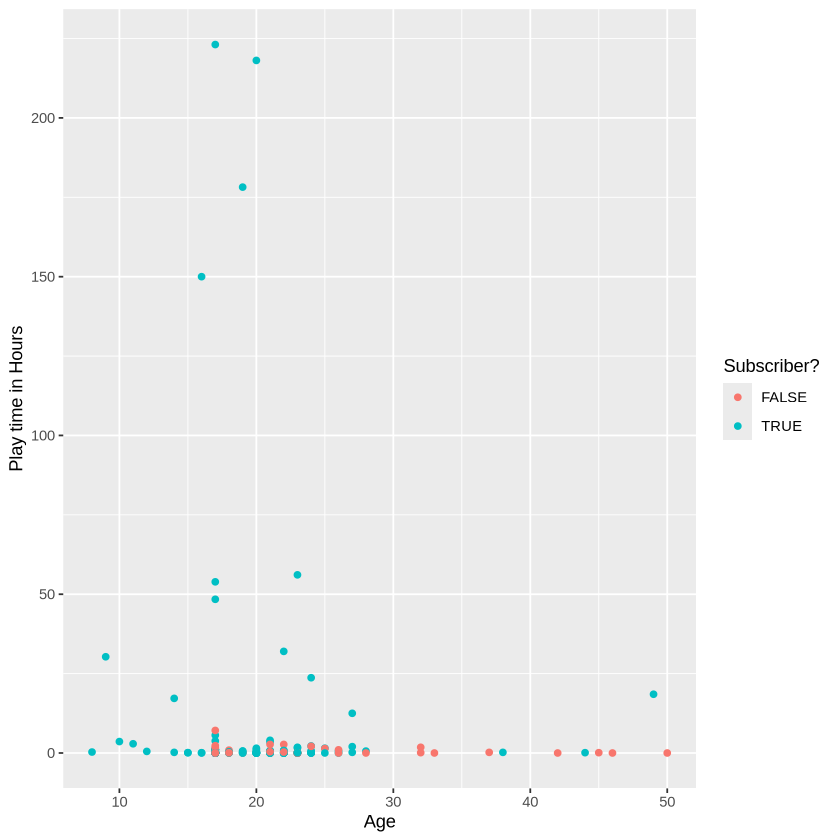

In [97]:
subscribed_players_plot <- ggplot(players_clean, aes(y = played_hours, x = Age, color = subscribe)) +
        geom_point() +
        labs(y = "Play time in Hours",
             x = "Age",
             color = "Subscriber?") +
        ggtitle("Figure 1: Age vs. Play Time by Subscription Status")
subscribed_players_plot

The plot above is quite bad, the points are clustered in a line near the bottom of the y axis because alot of players have spent 0 hours on the server. Will most likely affect our classifier negatively. 

In [145]:
set.seed(1)

To explore the different proportions of data to see how it affects classifier accuracy on predictions, we need to make a training/testing split. 

For this experiment we will test the accuracies generated from choosing 85%, 70%, and 55% for the training splits and then running KNN classification models for each proportion type and then evaluating the final accuracy. 70% will be our control. 

Note that to increase model performnace, we will perform tuning and 5 fold cross-validation to ensure robust and polished classifier accuracy and choose the optimal K neighbors to use based off the highest yielded accuracy. 

To do so we will create a model specification, a recipe with the correct variables and scale those variables, create folds, and then work them all together in a workflow for each proportion. After tuning and making the classifier, we substitue the optimal K into a new specifcation, reuse the same recipe, and fit it together in a tuned workflow and we will test it on the testing data for each proportion and evaluate its accuracy to see if they have significantly changed from the 70% proportion control. 

This method is accurate and valid because:
- KNN is well-suited for classification tasks with numeric predictors (like age and played_hours) and a categorical outcome (subscribe).

What are the potential limitations or weaknesses of the method selected?
- KNN can be slow on large datasets, especially with high-dimensional data.
- The data is quite empty (a lot of values for hours for certain individuals are at 0 and random amounts are subscribed and also not subscribed)

Which assumptions are required, if any, to apply the method selected?

- Predictors are scaled appropriately: since KNN relies on distance, all numeric predictors must be normalized to avoid dominance by variables with larger  ranges.

How did you compare and select the model?
For each train/test proportion:

We performed 5-fold cross-validation to tune K.

Chose the K value that yielded the highest average accuracy on validation folds.

Refit the model using the optimal K and evaluated accuracy on the test set.

Finally, we compared test accuracies across the 85%, 70% (control), and 55% training splits to determine if training size significantly impacted classifier performance.

EXP 1: 0.70 PROPORTION

In [6]:

players_cleaner <- players_clean |>
                mutate(subscribe = as_factor(subscribe)) |>
                mutate(subscribe = fct_recode(subscribe, 
                                              "YES" = "TRUE",
                                              "NO" = "FALSE")) |>
                drop_na()

players_split <- initial_split(players_cleaner, prop = 0.70, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)


players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

players_recipe <- recipe(subscribe ~ ., data = players_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

players_results <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_spec) |>
                    tune_grid(resamples = players_vfold, grid = k_vals ) |>
                    collect_metrics()

                    
accuracies <- players_results |>
                filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4578755,5,0.043592955,Preprocessor1_Model01
2,accuracy,binary,0.4578755,5,0.043592955,Preprocessor1_Model02
3,accuracy,binary,0.5171754,5,0.046577440,Preprocessor1_Model03
4,accuracy,binary,0.5245828,5,0.048646442,Preprocessor1_Model04
5,accuracy,binary,0.5917989,5,0.029165392,Preprocessor1_Model05
6,accuracy,binary,0.6063492,5,0.033540550,Preprocessor1_Model06
7,accuracy,binary,0.5917989,5,0.026710408,Preprocessor1_Model07
8,accuracy,binary,0.5846764,5,0.026270221,Preprocessor1_Model08
9,accuracy,binary,0.5926536,5,0.010254048,Preprocessor1_Model09


Now that we can see the different accuracies, we will plot the K neighbours and choose the amount of K that yields the highest accuracy.

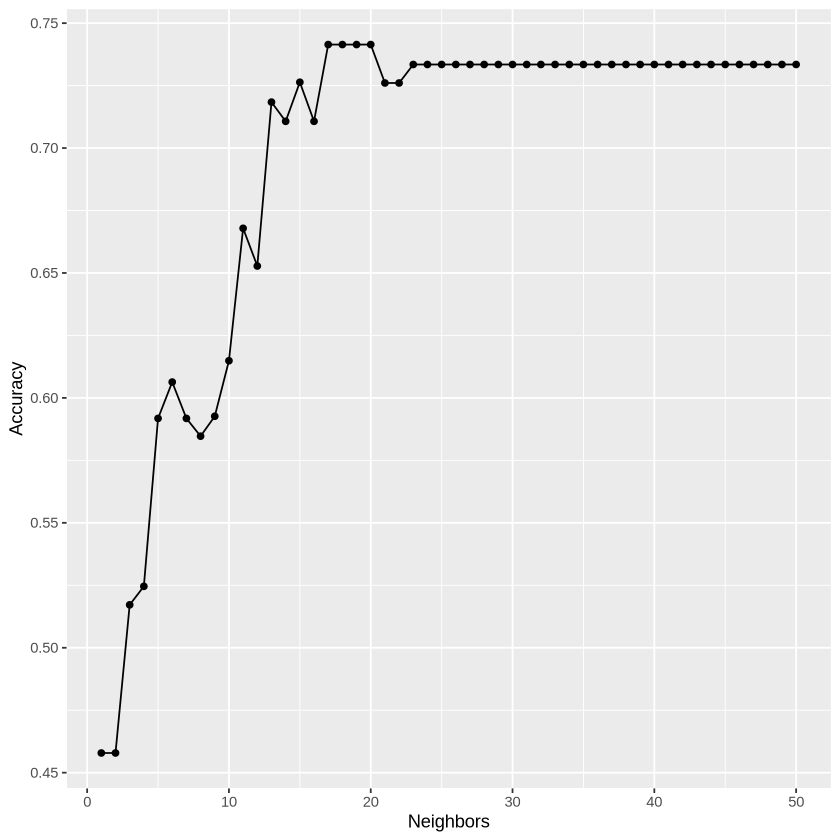

In [19]:
kneighbors1 <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors",
                     y = "Accuracy") +
                ggtitle("Figure 2: K neighbors x acc plot for 70% proportion split")
kneighbors1

Here we can see that picking 17 neighbors yields the highest accuracy of 74.14%. Let's see if the accuracy will change when we apply this tuned model with the optimal 17 neighbors on the testing data.

In [21]:

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k


players_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = 17) |>
                                    set_engine("kknn") |>
                                    set_mode("classification")
players_workflow <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_spec_test) |>
                    fit(data = players_training)

players_test_predictions <- predict(players_workflow, players_testing) |>
                            bind_cols(players_testing)

players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

[1] 17

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7457627


For our final conclusion, we can see that the accuracy has slightly increased from 74.14% to 74.58% when testing on the test data set. This will be our benchmark for the other proportions. 

EXP 2: 0.85 PROPORTION

In [12]:
players_split_85 <- initial_split(players_cleaner, prop = 0.85, strata = subscribe)
players_training_85 <- training(players_split_85)
players_testing_85 <- testing(players_split_85)


players_spec_85 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

players_recipe_85 <- recipe(subscribe ~ ., data = players_training_85) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

players_vfold_85 <- vfold_cv(players_training_85, v = 5, strata = subscribe)



players_results_85 <- workflow() |>
                    add_recipe(players_recipe_85) |>
                    add_model(players_spec_85) |>
                    tune_grid(resamples = players_vfold_85, grid = k_vals ) |>
                    collect_metrics()

                    
accuracies_85 <- players_results_85 |>
                filter(.metric == "accuracy")
accuracies_85

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4634470,5,0.030894442,Preprocessor1_Model01
2,accuracy,binary,0.4634470,5,0.030894442,Preprocessor1_Model02
3,accuracy,binary,0.5056818,5,0.038970996,Preprocessor1_Model03
4,accuracy,binary,0.5056818,5,0.038970996,Preprocessor1_Model04
5,accuracy,binary,0.5356061,5,0.043446821,Preprocessor1_Model05
6,accuracy,binary,0.5356061,5,0.043446821,Preprocessor1_Model06
7,accuracy,binary,0.5789773,5,0.016736467,Preprocessor1_Model07
8,accuracy,binary,0.5789773,5,0.016736467,Preprocessor1_Model08
9,accuracy,binary,0.5973485,5,0.025037277,Preprocessor1_Model09


The highest accuracy here across the neighbors is 20, we can see that it yields an accuracy of 75%, We see if this values changes after testing the testing data again. 

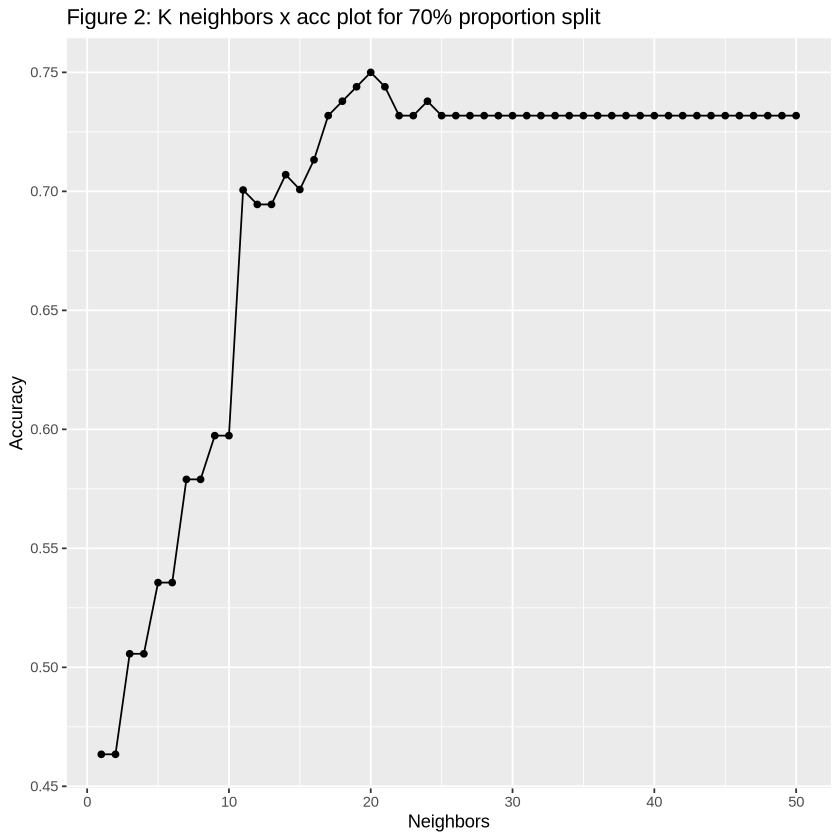

In [148]:
kneighbors2 <- ggplot(accuracies_85, aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors",
                     y = "Accuracy") +
                ggtitle("Figure 2: K neighbors x acc plot for 70% proportion split")
kneighbors2

###############CMT ABT ACC AND NEIGHBOR####

In [20]:
best_k_85 <- accuracies_85 |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k_85


players_spec_test_85 <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |>
                                    set_engine("kknn") |>
                                    set_mode("classification")
players_workflow_85 <- workflow() |>
                    add_recipe(players_recipe_85) |>
                    add_model(players_spec_test_85) |>
                    fit(data = players_training_85)

players_test_predictions_85 <- predict(players_workflow_85, players_testing_85) |>
                            bind_cols(players_testing_85)

players_test_predictions_85 |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

[1] 20

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7333333


Interesting! The accuracy actually decreased lower than the 70% proportion training/testing split. Let's try the 55% proportion now. 

EXP 3: 0.55 proportion 

In [146]:
players_split_55 <- initial_split(players_cleaner, prop = 0.55, strata = subscribe)
players_training_55 <- training(players_split_55)
players_testing_55 <- testing(players_split_55)


players_spec_55 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

players_recipe_55 <- recipe(subscribe ~ ., data = players_training_55) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

players_vfold_55 <- vfold_cv(players_training, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

players_results <- workflow() |>
                    add_recipe(players_recipe_55) |>
                    add_model(players_spec_55) |>
                    tune_grid(resamples = players_vfold_55, grid = k_vals ) |>
                    collect_metrics()

                    
accuracies_55 <- players_results |>
                filter(.metric == "accuracy")
accuracies_55

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4809117,5,0.032851980,Preprocessor1_Model01
2,accuracy,binary,0.4809117,5,0.032851980,Preprocessor1_Model02
3,accuracy,binary,0.4957875,5,0.040683752,Preprocessor1_Model03
4,accuracy,binary,0.4817664,5,0.029416558,Preprocessor1_Model04
5,accuracy,binary,0.5119455,5,0.030398966,Preprocessor1_Model05
6,accuracy,binary,0.5339031,5,0.027309591,Preprocessor1_Model06
7,accuracy,binary,0.5632682,5,0.025395374,Preprocessor1_Model07
8,accuracy,binary,0.5336386,5,0.023231614,Preprocessor1_Model08
9,accuracy,binary,0.5635531,5,0.033806639,Preprocessor1_Model09


Highest accuracy for range of K = 21!

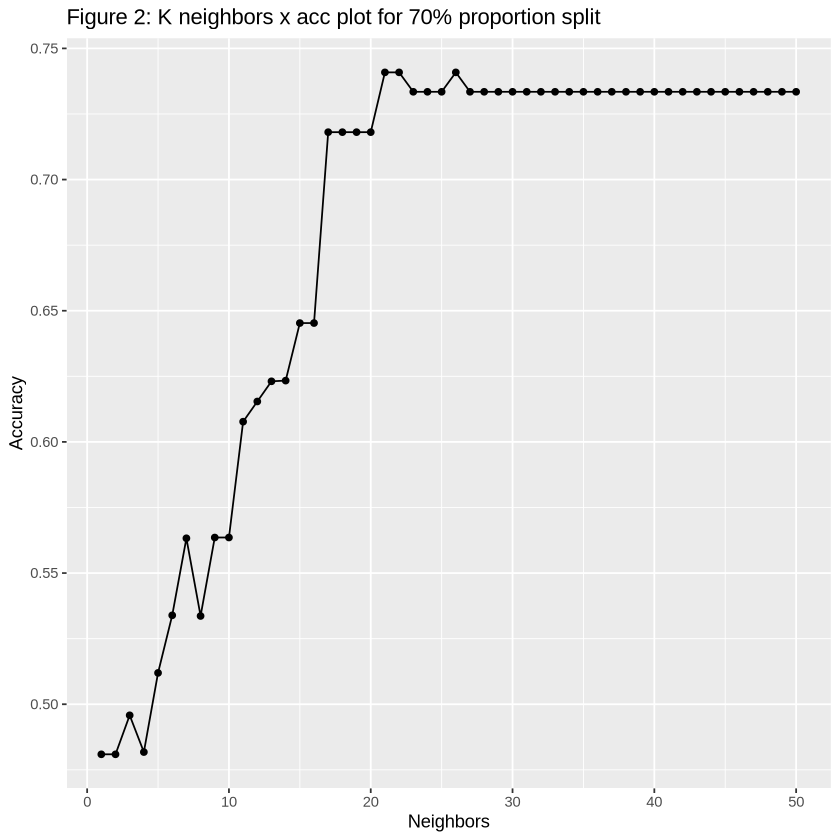

In [151]:
kneighbors3 <- ggplot(accuracies_55, aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors",
                     y = "Accuracy") +
                ggtitle("Figure 2: K neighbors x acc plot for 70% proportion split")
kneighbors3

In [150]:
best_k_55 <- accuracies_55 |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k_55


players_spec_test_55 <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
                                    set_engine("kknn") |>
                                    set_mode("classification")
players_workflow_55 <- workflow() |>
                    add_recipe(players_recipe_55) |>
                    add_model(players_spec_test_55) |>
                    fit(data = players_training_55)

players_test_predictions_55 <- predict(players_workflow_55, players_testing_55) |>
                            bind_cols(players_testing_55)

players_test_predictions_55 |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

[1] 21

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7272727


Now the accuracy is actually the lowest of them all decreasing from 73% to 72.72% to 74.57%! Therefore the answer to our original question is NO, changing the proportion of the testing/training split between 85, 70 and 55 does not significantly change the accuracy (>5) of the final model when comparing it to the control of 70%. 

However, our model has many limitations and is testing on an unlucky set of data which shows little capabability because of so many 0 hour values for individuals. Perhaps deleting those observations and only testing on indidivuals who play and recording their age may change to range for which the accuracies vary. 

In [ ]:
DISCUSSION:

Summary of Findings and Interpretation:
After running KNN classification models with three different training/testing splits (85%, 70%, and 55%), we observed the following accuracy trends after hyperparameter tuning and cross-validation:

70% training (30% test) yielded the highest classification accuracy

85% training (15% test) performed slightly worse than the control.

55% training (45% test) had the lowest accuracy of the three.

Was this what we expected?
To some extent. We expected the 55% training split to achieve the lowest accuracy and it did, since it has less training data, which typically limits the model's ability to predict well because it was taught less. However, it was somewhat surprising that 85% training did not outperform 70%, even though it had more training data available. 

This suggests that more training data doesn’t always guarantee better performance, especially when:

- The test set (in the 85/15 split) becomes so small that it doesn’t reliably reflect metrics like accuracy, precision, recall well because the weight on the observations increases which the metric values to be unstable 

What impact could such findings have?
These findings highlight an important lesson for data scientists and ML practitioners:

- Optimal training size is context-dependent on whether your data is good e, blindly maximizing training data isn’t always good.

- A balanced split like 70/30 may offer a better tradeoff between having enough training data to learn and enough test data to validate performance reliably.

In real-world scenarios, this insight can help organizations:

- Work with data more strategically by wrangling and getting enough and quality data before training models.

- Avoid overcommitting data to training proportions for better accuracy. 

- Be more intentional with data partitioning and model tuning practices.

What future questions does this raise?
This experiment opens up several interesting directions for further analysis:

Could the classifier be improved by removing the many 0 hour values in the players_cleaner data set?

What happens if we repeat this process with a much larger dataset with more realistic and full range of observations on the axes?

How does the level of class imbalance impact performance across different splits?

Could repeated cross-validation or bootstrap methods further stabilize the observed trends? (increasing folds?)

Ultimately, these findings suggest that model performance is not just about model type or tuning but rather the wrangling of data and the requirements and complexity of the data itself. 